In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gray Image')

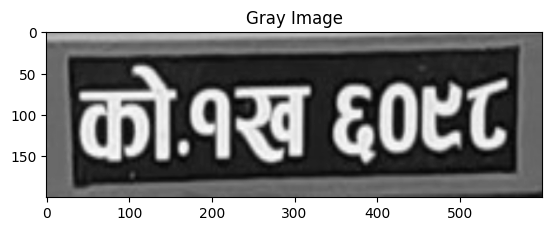

In [2]:
image_path = '../images/license10.jpg'

image = cv2.imread(image_path)
image = cv2.resize(image, (600,200))

gray_image = image.copy()
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

Text(0.5, 1.0, 'Original Image RGB')

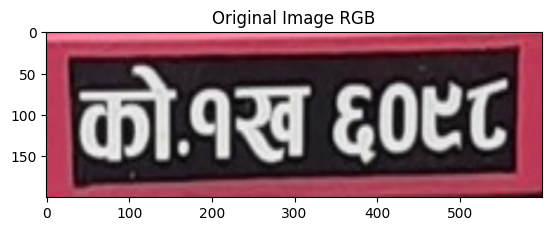

In [23]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image RGB')

Text(0.5, 1.0, 'Histogram of Gray Image')

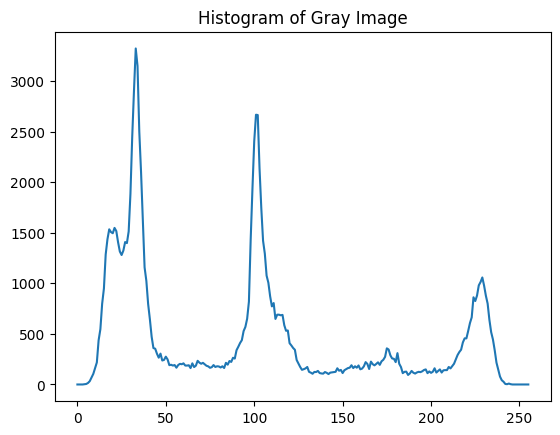

In [3]:
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(hist_gray)
plt.title('Histogram of Gray Image')

Text(0.5, 1.0, 'Equalized Gray Image')

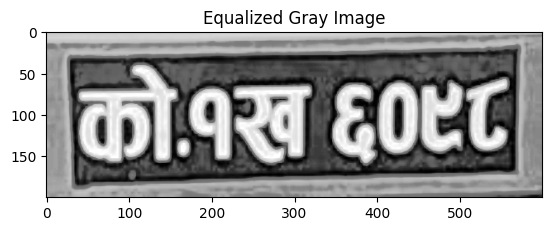

In [4]:
# histogram equalization

gray_equalized = cv2.equalizeHist(gray_image)
plt.imshow(gray_equalized, cmap='gray')
plt.title('Equalized Gray Image')

Text(0.5, 1.0, 'Histogram of Equalized Gray Image')

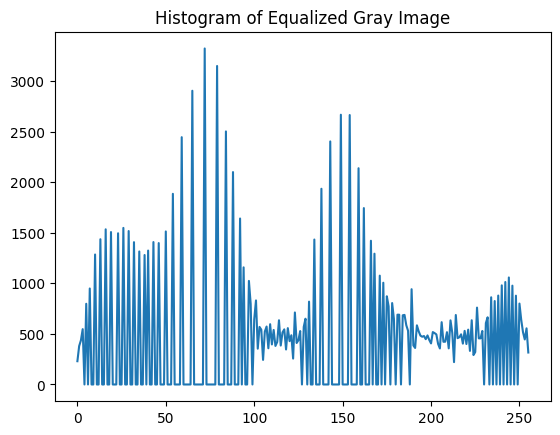

In [5]:
gray_eq_hist = cv2.calcHist([gray_equalized], [0], None, [256], [0, 256])
plt.plot(gray_eq_hist)
plt.title('Histogram of Equalized Gray Image')

Text(0.5, 1.0, 'Histogram of Blue, Green and Red')

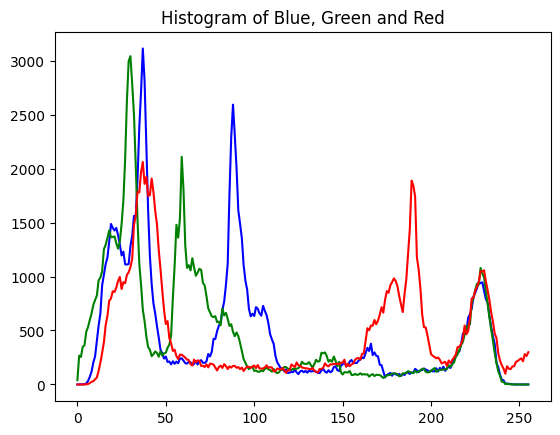

In [25]:
# histogram equalization on color image

b,g,r = cv2.split(image)

hist_blue = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([r],[0],None,[256],[0,256])

plt.plot(hist_blue, color='b')
plt.plot(hist_green, color='g')
plt.plot(hist_red, color='r')
plt.title('Histogram of Blue, Green and Red')


Text(0.5, 1.0, 'HSV Image')

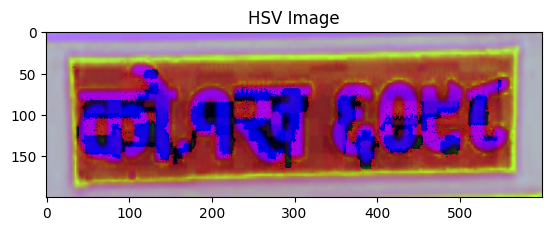

In [24]:
# equalizing the color image using histogram equalization

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)
plt.title('HSV Image')

Text(0.5, 1.0, 'Enhanced Image Histogram')

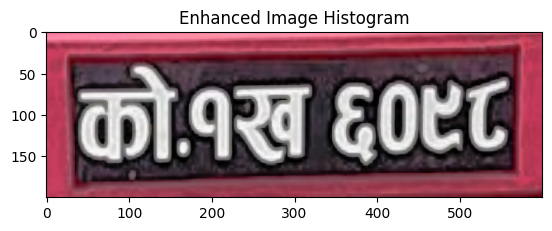

In [33]:
h,s,v = cv2.split(image_hsv)

v_eq = cv2.equalizeHist(v)
hsv_eq = cv2.merge([h,s,v_eq])
bgr_enhanced = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2BGR)
plt.imshow(cv2.cvtColor(bgr_enhanced, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image Histogram')

Text(0.5, 1.0, 'Histogram of Enhanced Blue, Green and Red')

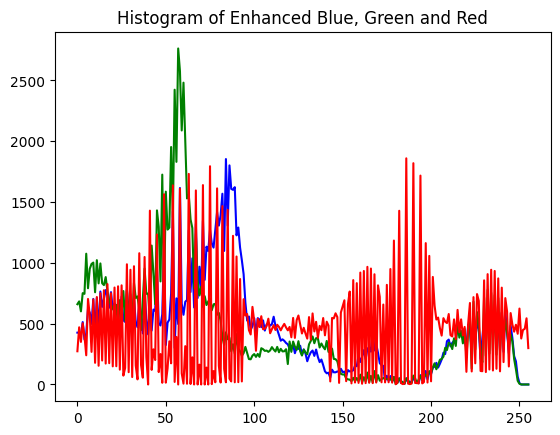

In [29]:
b_enhanced, g_enhanced, r_enhanced = cv2.split(bgr_enhanced)
b_enhanced_hist = cv2.calcHist([b_enhanced], [0], None, [256], [0, 256])
g_enhanced_hist = cv2.calcHist([g_enhanced], [0], None, [256], [0, 256])
r_enhanced_hist = cv2.calcHist([r_enhanced], [0], None, [256], [0, 256])

plt.plot(b_enhanced_hist, color='b')
plt.plot(g_enhanced_hist, color='g')
plt.plot(r_enhanced_hist, color='r')
plt.title('Histogram of Enhanced Blue, Green and Red')

Text(0.5, 1.0, 'Enhanced Image CLAHE')

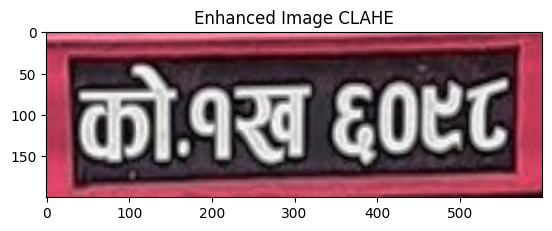

In [35]:
# clahe
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(v)
clahe_hsv = cv2.merge([h,s,clahe_image])
bgr_clahe_enhanced = cv2.cvtColor(clahe_hsv, cv2.COLOR_HSV2BGR)
plt.imshow(cv2.cvtColor(bgr_clahe_enhanced, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image CLAHE')

Text(0.5, 1.0, 'Histogram of Enhanced Blue, Green and Red CLAHE')

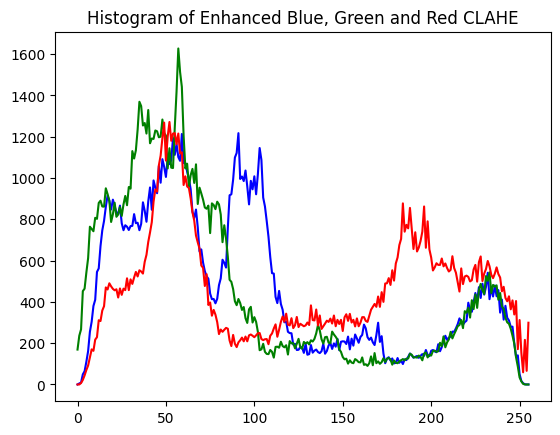

In [36]:
b_enhanced_clahe, g_enhanced_clahe, r_enhanced_clahe = cv2.split(bgr_clahe_enhanced)

b_enhanced_clahe_hist = cv2.calcHist([b_enhanced_clahe], [0], None, [256], [0, 256])
g_enhanced_clahe_hist = cv2.calcHist([g_enhanced_clahe], [0], None, [256], [0, 256])
r_enhanced_clahe_hist = cv2.calcHist([r_enhanced_clahe], [0], None, [256], [0, 256])

plt.plot(b_enhanced_clahe_hist, color='b')
plt.plot(g_enhanced_clahe_hist, color='g')
plt.plot(r_enhanced_clahe_hist, color='r')
plt.title('Histogram of Enhanced Blue, Green and Red CLAHE')

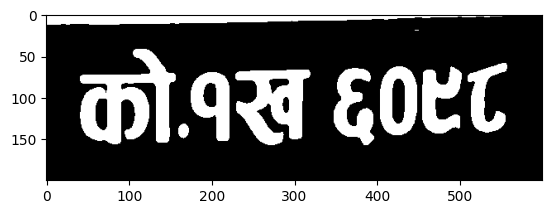

In [27]:
ret, thresh = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')